# Malaysia Home Price Predictor

### Reference :
- https://loanstreet.com.my/learning-centre/types-of-residential-houses-malaysia
### Sample test case :
- https://www.iproperty.com.my/property/permas-jaya/fair-view-apartment/sale-106318143/
- https://www.iproperty.com.my/building/fair-view-apartment-pty_65995/ 
### Github Link : 
- https://github.com/ShaaiRao03/malaysia-property-prices-forecast

In [74]:
import pandas as pd  
import matplotlib
from matplotlib import pyplot as plt 
import numpy as np 
import seaborn as sns 
matplotlib.style.use('ggplot')
import plotly.express as px 

pd.set_option('display.max_columns', None)

*****Data Preprocessing*****

In [75]:
df = pd.read_csv("houses.csv") 
df.shape

(4000, 32)

In [76]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   description             4000 non-null   object
 1   Bedroom                 4000 non-null   object
 2   Bathroom                4000 non-null   object
 3   Property Size           4000 non-null   object
 4   Nearby School           687 non-null    object
 5   Nearby Mall             365 non-null    object
 6   Ad List                 4000 non-null   int64 
 7   Category                4000 non-null   object
 8   Facilities              4000 non-null   object
 9   Building Name           4000 non-null   object
 10  Developer               4000 non-null   object
 11  Tenure Type             4000 non-null   object
 12  Address                 4000 non-null   object
 13  Completion Year         4000 non-null   object
 14  # of Floors             4000 non-null   object
 15  Tota

In [77]:
df.head(5) 

,description,Bedroom,Bathroom,Property Size,Nearby School,Nearby Mall,Ad List,Category,Facilities,Building Name,Developer,Tenure Type,Address,Completion Year,# of Floors,Total Units,Property Type,Parking Lot,Floor Range,Land Title,Firm Type,Firm Number,REN Number,Bus Stop,Mall,Park,School,Hospital,price,Highway,Nearby Railway Station,Railway Station
0,Iconic Building @ KL SETAPAK\nNew launching & ...,4,2,1000 sq.ft.,Sekolah Menengah Pendidikan Khas Cacat Penglih...,Setapak Central,98187451,"Apartment / Condominium, For sale",-,Kenwingston Platz,Kenwingston Group,Freehold,"Jalan Gombak, Setapak, Kuala Lumpur",-,-,-,Service Residence,2,-,Non Bumi Lot,VE,30338,-,Bus Stop Starparc Point\nBus Stop Setapak Cent...,Setapak Central,"Park at Taman Tasik Danau Kota, Setapak, Kuala...",Sekolah Menengah Pendidikan Khas Cacat Penglih...,Columbia Asia Hospital,RM 340 000,NaN,NaN,NaN
1,"FOR SALE @ RM250,000\nIntroduction:\n~ Pangsap...",3,2,980 sq.ft.,NaN,NaN,101683090,"Apartment / Condominium, For sale","Parking, Security, Swimming Pool, Playground, ...",Kenanga (Park View Court),-,Freehold,"Jalan Kenanga 3/8, Melaka City, Melaka",-,-,-,Apartment,1,Low,Non Bumi Lot,E,30812,REN 15862,NaN,NaN,NaN,NaN,NaN,RM 250 000,NaN,NaN,NaN
2,"[Below Market] Sri Lavender Apartment,Tmn Sepa...",3,2,1000 sq.ft.,NaN,NaN,103792905,"Apartment / Condominium, For sale","Playground, Minimart, Jogging Track, Barbeque ...",Sri Lavender Apartment,TLS Group,Freehold,"Jalan Sepakat Indah 2/1, Taman Sepakat Indah 2...",2007,13,445,Apartment,1,Medium,Non Bumi Lot,-,-,-,NaN,NaN,NaN,NaN,NaN,RM 230 000,SILK Sg Ramal (T) Toll Plaza,NaN,NaN
3,Flat Pandan Indah\nJalan Pandan Indah 3/3\nNon...,3,1,592 sq.ft.,NaN,NaN,103806240,"Apartment / Condominium, For sale","Parking, Playground, Minimart, Jogging Track",Flat Pandan Indah,-,Leasehold,"jalan pandan indah 3/3, Selangor, Ampang",-,-,-,Flat,1,-,Non Bumi Lot,E,11584,REN 16279,NaN,NaN,NaN,NaN,NaN,RM 158 000,NaN,NaN,NaN
4,"* Open-concept Soho with balcony, unblock view...",1,1,467 sq.ft.,Sekolah Jenis Kebangsaan (T) Ladang Midlands,i-Soho i-City,103806234,"Apartment / Condominium, For sale","Minimart, Gymnasium, Parking, Security",i-Soho @ i-City,i-Berhad,Freehold,"Jalan Plumbum 7/102, Shah Alam, Selangor",-,43,956,Studio,-,Low,Bumi Lot,E,31916,-,Bus Stop at Persiaran Permai 1\nBus Stop at Pe...,i-Soho i-City\nGulati\nCentral i-City Shopping...,"Park 2 at Section 7, Shah Alam\nPark 1 at Sect...",Sekolah Jenis Kebangsaan (T) Ladang Midlands\n...,Osel Clinic (Shah Alam)\nHospital Shah Alam,RM 305 000,NaN,NaN,NaN


In [78]:
columns_to_drop = ['description','Nearby Mall','Nearby School','Ad List','Nearby Railway Station']
df.drop(columns=columns_to_drop,inplace=True)

In [79]:
# Identifying the structure of column "REN Number" 
df["REN Number"]

0               -
1       REN 15862
2               -
3       REN 16279
4               -
          ...    
3995            -
3996            -
3997            -
3998            -
3999    REN 33845
Name: REN Number, Length: 4000, dtype: object

In [80]:
df.isnull().sum()

Bedroom               0
Bathroom              0
Property Size         0
Category              0
Facilities            0
Building Name         0
Developer             0
Tenure Type           0
Address               0
Completion Year       0
# of Floors           0
Total Units           0
Property Type         0
Parking Lot           0
Floor Range           0
Land Title            0
Firm Type           203
Firm Number         203
REN Number          203
Bus Stop           3292
Mall               3525
Park               3193
School             3052
Hospital           3657
price                 0
Highway            3859
Railway Station    3515
dtype: int64

In [81]:
# Checking for unique values in each column 
all_features = df.columns

for i in all_features:
    unique_values = df[i].unique()

    if len(unique_values) <= 100:
        print(f"\nUnique values in column '{i}': {unique_values.tolist()} \n")  



Unique values in column 'Bedroom': ['4', '3', '1', '2', '5', '6', '-', '10', '8'] 


Unique values in column 'Bathroom': ['2', '1', '3', '4', '5', '-', '6', '7', '8'] 


Unique values in column 'Category': ['Apartment / Condominium, For sale'] 


Unique values in column 'Tenure Type': ['Freehold', 'Leasehold'] 


Unique values in column 'Completion Year': ['-', '2007', '2010', '2000', '2008', '2021', '2016', '1990', '1998', '2020', '2018', '2015', '2019', '2014', '2002', '1999', '2017', '2006', '2023', '2011', '2003', '2013', '2022', '1993', '1995', '1997', '2012', '1996', '2009', '2001', '2005', '2004', '1989', '2026', '2024', '2025', '1994', '1992', '1991', '1987', '1985'] 


Unique values in column '# of Floors': ['-', '13', '43', '19', '5', '12', '435', '18', '24', '10', '33', '44', '17', '25', '4', '35', '26', '29', '21', '30', '41', '16', '15', '42', '22', '23', '20', '27', '38', '31', '9', '8', '11', '14', '34', '32', '6', '28', '40', '55', '486', '49', '60', '46', '37', '7', '

In [82]:
# Checking if theres any row in data frame with '-'
df[df == '-'].any().reset_index() 

,index,0
0,Bedroom,True
1,Bathroom,True
2,Property Size,False
3,Category,False
4,Facilities,True
5,Building Name,True
6,Developer,True
7,Tenure Type,False
8,Address,True
9,Completion Year,True


In [83]:
#converting columns with numbers that contain '-' into 0 
df["Bedroom"] = df["Bedroom"].replace('-','0')
df["Bathroom"] = df["Bathroom"].replace('-','0') 
df["# of Floors"] = df["# of Floors"].replace('-','0')  
df["Parking Lot"] = df["Parking Lot"].replace('-','0')  
df["Total Units"] = df["Total Units"].replace('-','0')  
df["Parking Lot"] = df["Parking Lot"].replace('-','0')  

#converting columns with strings that contain '-' into 'Unknown' 
df["Facilities"] = df["Bedroom"].replace('-','Unknown')
df["Building Name"] = df["Building Name"].replace('-','Unknown')
df["Developer"] = df["Developer"].replace('-','Unknown')
df["Completion Year"] = df["Completion Year"].replace('-','Unknown')
df["Floor Range"] = df["Floor Range"].replace('-','Unknown')
df["Firm Number"] = df["Firm Number"].replace('-','Unknown')
df["Firm Type"] = df["Firm Type"].replace('-','Unknown')
df["REN Number"] = df["REN Number"].replace('-','Unknown')

#dropping rows of df which contain '-' in "Address" column. This is because the state which can be extracted from address is one of the important feature in prediction. 
df.drop(df[(df['Address'] == '-')].index, inplace=True)


In [84]:
# Now we can see that Bedroom doesnt have '-' as we replaced all of them with '0'
df[df == '-'].any().reset_index()

,index,0
0,Bedroom,False
1,Bathroom,False
2,Property Size,False
3,Category,False
4,Facilities,False
5,Building Name,False
6,Developer,False
7,Tenure Type,False
8,Address,False
9,Completion Year,False


In [85]:
# Checking for null values
df.isnull().any().reset_index() 

,index,0
0,Bedroom,False
1,Bathroom,False
2,Property Size,False
3,Category,False
4,Facilities,False
5,Building Name,False
6,Developer,False
7,Tenure Type,False
8,Address,False
9,Completion Year,False


In [86]:
# Fill missing values column with 'Unknown'
df['Firm Type'] = df['Firm Type'].fillna('Unknown')
df['Firm Number'] = df['Firm Number'].fillna('Unknown')
df['REN Number'] = df['REN Number'].fillna('Unknown')
df['Bus Stop'] = df['Bus Stop'].fillna('Unknown')
df['Mall'] = df['Mall'].fillna('Unknown')
df['Park'] = df['Park'].fillna('Unknown')
df['School'] = df['School'].fillna('Unknown')
df['Hospital'] = df['Hospital'].fillna('Unknown')
df['Highway'] = df['Highway'].fillna('Unknown')
df['Railway Station'] = df['Railway Station'].fillna('Unknown')

In [87]:
df.isnull().any().reset_index() 

,index,0
0,Bedroom,False
1,Bathroom,False
2,Property Size,False
3,Category,False
4,Facilities,False
5,Building Name,False
6,Developer,False
7,Tenure Type,False
8,Address,False
9,Completion Year,False


In [88]:
# At this stage, all null values have been cleaned
df.isnull().sum()

Bedroom            0
Bathroom           0
Property Size      0
Category           0
Facilities         0
Building Name      0
Developer          0
Tenure Type        0
Address            0
Completion Year    0
# of Floors        0
Total Units        0
Property Type      0
Parking Lot        0
Floor Range        0
Land Title         0
Firm Type          0
Firm Number        0
REN Number         0
Bus Stop           0
Mall               0
Park               0
School             0
Hospital           0
price              0
Highway            0
Railway Station    0
dtype: int64

In [89]:
malay_states_federal = ['johor','sabah', 'sarawak','selangor','kedah', 'kelantan', 
        'perak','pahang', 'perlis', 'penang', 'terengganu',
        'melaka', 'negeri sembilan','kuala lumpur', 'labuan', 'putrajaya']

def state_federal_extractor(address):
    splitted_address = [i.strip().lower() for i in address.split(",")]

    # Assumption has been made where we can identify the state at the last or second last index (only for this dfset).  
    # This is because iterating through each part in splitted_address increases the time complexity 
    if splitted_address[-1] in malay_states_federal:
        return splitted_address[-1]
    elif splitted_address[-2] in malay_states_federal:
        return splitted_address[-2]
    else:
        return None


In [90]:
# Checking the structure before extracting the address 
df.shape

(3913, 27)

In [91]:
df["State"] = df["Address"].apply(state_federal_extractor)
df["Property Size"] = df["Property Size"] .apply(lambda x: x.split("sq.ft")[0].strip()) #convert "1000 sq.ft." -> "1000"
df["price"] = df["price"].apply(lambda x: x.split('RM')[-1].strip().replace(" ", "")) #convert "RM 250 000" -> "250 000" -> "250000"
 
#dropping rows that doesnt have "State" 
df.dropna(subset=['State'], inplace=True)

In [92]:
df.price

0        340000
1        250000
2        230000
3        158000
4        305000
         ...   
3995    1050000
3996     345000
3997     360000
3998     535000
3999     260000
Name: price, Length: 3913, dtype: object

In [93]:
# Checking the structure after extracting the states and merging it to the dfframe. 
# From here , I can observe that , all states has been succesfully been extracted as before and after has the same structure in terms of rows. 
df.shape

(3913, 28)

In [94]:
# "States" has no null values 
df.isnull().sum()

Bedroom            0
Bathroom           0
Property Size      0
Category           0
Facilities         0
Building Name      0
Developer          0
Tenure Type        0
Address            0
Completion Year    0
# of Floors        0
Total Units        0
Property Type      0
Parking Lot        0
Floor Range        0
Land Title         0
Firm Type          0
Firm Number        0
REN Number         0
Bus Stop           0
Mall               0
Park               0
School             0
Hospital           0
price              0
Highway            0
Railway Station    0
State              0
dtype: int64

In [95]:
df.head()

,Bedroom,Bathroom,Property Size,Category,Facilities,Building Name,Developer,Tenure Type,Address,Completion Year,# of Floors,Total Units,Property Type,Parking Lot,Floor Range,Land Title,Firm Type,Firm Number,REN Number,Bus Stop,Mall,Park,School,Hospital,price,Highway,Railway Station,State
0,4,2,1000,"Apartment / Condominium, For sale",4,Kenwingston Platz,Kenwingston Group,Freehold,"Jalan Gombak, Setapak, Kuala Lumpur",Unknown,0,0,Service Residence,2,Unknown,Non Bumi Lot,VE,30338,Unknown,Bus Stop Starparc Point\nBus Stop Setapak Cent...,Setapak Central,"Park at Taman Tasik Danau Kota, Setapak, Kuala...",Sekolah Menengah Pendidikan Khas Cacat Penglih...,Columbia Asia Hospital,340000,Unknown,Unknown,kuala lumpur
1,3,2,980,"Apartment / Condominium, For sale",3,Kenanga (Park View Court),Unknown,Freehold,"Jalan Kenanga 3/8, Melaka City, Melaka",Unknown,0,0,Apartment,1,Low,Non Bumi Lot,E,30812,REN 15862,Unknown,Unknown,Unknown,Unknown,Unknown,250000,Unknown,Unknown,melaka
2,3,2,1000,"Apartment / Condominium, For sale",3,Sri Lavender Apartment,TLS Group,Freehold,"Jalan Sepakat Indah 2/1, Taman Sepakat Indah 2...",2007,13,445,Apartment,1,Medium,Non Bumi Lot,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,230000,SILK Sg Ramal (T) Toll Plaza,Unknown,selangor
3,3,1,592,"Apartment / Condominium, For sale",3,Flat Pandan Indah,Unknown,Leasehold,"jalan pandan indah 3/3, Selangor, Ampang",Unknown,0,0,Flat,1,Unknown,Non Bumi Lot,E,11584,REN 16279,Unknown,Unknown,Unknown,Unknown,Unknown,158000,Unknown,Unknown,selangor
4,1,1,467,"Apartment / Condominium, For sale",1,i-Soho @ i-City,i-Berhad,Freehold,"Jalan Plumbum 7/102, Shah Alam, Selangor",Unknown,43,956,Studio,0,Low,Bumi Lot,E,31916,Unknown,Bus Stop at Persiaran Permai 1\nBus Stop at Pe...,i-Soho i-City\nGulati\nCentral i-City Shopping...,"Park 2 at Section 7, Shah Alam\nPark 1 at Sect...",Sekolah Jenis Kebangsaan (T) Ladang Midlands\n...,Osel Clinic (Shah Alam)\nHospital Shah Alam,305000,Unknown,Unknown,selangor


In [96]:
# Convert columns to integer
df['Bedroom'] = df['Bedroom'].astype('int')  
df['Bathroom'] = df['Bathroom'].astype('int')  
df['Total Units'] = df['Total Units'].astype('int')  
df['# of Floors'] = df['# of Floors'].astype('int')  
df['Parking Lot'] = df['Parking Lot'].astype('int')  

# # Convert columns to float
df['Property Size'] = df['Property Size'].astype('float')  
df['price'] = df['price'].astype('float')

# # Convert columns to either 0 or 1 where 0=exist , 1=not exist 
df['Highway'] = df['Highway'].apply(lambda x: "1" if x != "Unknown" else "0").astype('int')
df['Railway Station'] = df['Railway Station'].apply(lambda x: "1" if x != "Unknown" else "0").astype('int')
df['Hospital'] = df['Hospital'].apply(lambda x: "1" if x != "Unknown" else "0").astype('int')
df['School'] = df['School'].apply(lambda x: "1" if x != "Unknown" else "0").astype('int')
df['Park'] = df['Park'].apply(lambda x: "1" if x != "Unknown" else "0").astype('int')
df['Mall'] = df['Mall'].apply(lambda x: "1" if x != "Unknown" else "0").astype('int')
df['Bus Stop'] = df['Bus Stop'].apply(lambda x: "1" if x != "Unknown" else "0").astype('int')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3913 entries, 0 to 3999
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Bedroom          3913 non-null   int32  
 1   Bathroom         3913 non-null   int32  
 2   Property Size    3913 non-null   float64
 3   Category         3913 non-null   object 
 4   Facilities       3913 non-null   object 
 5   Building Name    3913 non-null   object 
 6   Developer        3913 non-null   object 
 7   Tenure Type      3913 non-null   object 
 8   Address          3913 non-null   object 
 9   Completion Year  3913 non-null   object 
 10  # of Floors      3913 non-null   int32  
 11  Total Units      3913 non-null   int32  
 12  Property Type    3913 non-null   object 
 13  Parking Lot      3913 non-null   int32  
 14  Floor Range      3913 non-null   object 
 15  Land Title       3913 non-null   object 
 16  Firm Type        3913 non-null   object 
 17  Firm Number      39

In [98]:
df.head()

,Bedroom,Bathroom,Property Size,Category,Facilities,Building Name,Developer,Tenure Type,Address,Completion Year,# of Floors,Total Units,Property Type,Parking Lot,Floor Range,Land Title,Firm Type,Firm Number,REN Number,Bus Stop,Mall,Park,School,Hospital,price,Highway,Railway Station,State
0,4,2,1000.0,"Apartment / Condominium, For sale",4,Kenwingston Platz,Kenwingston Group,Freehold,"Jalan Gombak, Setapak, Kuala Lumpur",Unknown,0,0,Service Residence,2,Unknown,Non Bumi Lot,VE,30338,Unknown,1,1,1,1,1,340000.0,0,0,kuala lumpur
1,3,2,980.0,"Apartment / Condominium, For sale",3,Kenanga (Park View Court),Unknown,Freehold,"Jalan Kenanga 3/8, Melaka City, Melaka",Unknown,0,0,Apartment,1,Low,Non Bumi Lot,E,30812,REN 15862,0,0,0,0,0,250000.0,0,0,melaka
2,3,2,1000.0,"Apartment / Condominium, For sale",3,Sri Lavender Apartment,TLS Group,Freehold,"Jalan Sepakat Indah 2/1, Taman Sepakat Indah 2...",2007,13,445,Apartment,1,Medium,Non Bumi Lot,Unknown,Unknown,Unknown,0,0,0,0,0,230000.0,1,0,selangor
3,3,1,592.0,"Apartment / Condominium, For sale",3,Flat Pandan Indah,Unknown,Leasehold,"jalan pandan indah 3/3, Selangor, Ampang",Unknown,0,0,Flat,1,Unknown,Non Bumi Lot,E,11584,REN 16279,0,0,0,0,0,158000.0,0,0,selangor
4,1,1,467.0,"Apartment / Condominium, For sale",1,i-Soho @ i-City,i-Berhad,Freehold,"Jalan Plumbum 7/102, Shah Alam, Selangor",Unknown,43,956,Studio,0,Low,Bumi Lot,E,31916,Unknown,1,1,1,1,1,305000.0,0,0,selangor


In [99]:
df.describe() 

,Bedroom,Bathroom,Property Size,# of Floors,Total Units,Parking Lot,Bus Stop,Mall,Park,School,Hospital,price,Highway,Railway Station
count,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3.913000e+03,3913.000000,3913.000000
mean,2.917455,2.019167,1035.799642,12.454638,329.205980,1.047023,0.180935,0.121390,0.206236,0.242269,0.087657,4.205704e+05,0.036034,0.123946
std,0.691450,0.606619,2033.682963,22.297580,530.525195,0.909975,0.385014,0.326622,0.404653,0.428511,0.282831,3.273007e+05,0.186398,0.329562
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.800000e+04,0.000000,0.000000
25%,3.000000,2.000000,750.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000e+05,0.000000,0.000000
50%,3.000000,2.000000,900.000000,5.000000,114.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.500000e+05,0.000000,0.000000
75%,3.000000,2.000000,1117.000000,21.000000,482.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.900000e+05,0.000000,0.000000
max,10.000000,8.000000,122774.000000,504.000000,7810.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.016000e+06,1.000000,1.000000


In [100]:
#Identifying outliers by using percentile method  

min_threshold_bedroom,max_threshold_bedroom = df["Bedroom"].quantile([0.1,0.99]) # 2 to 5
min_threshold_bathroom,max_threshold_bathroom = df["Bathroom"].quantile([0.1,0.99]) # 1 to 4
min_threshold_ps,max_threshold_ps = df["Property Size"].quantile([0.1,0.99]) # 650 to 2750
# min_threshold_floors,max_threshold_floors = df["# of Floors"].quantile([0.6,0.99]) # 14 to 46 
min_threshold_floors,max_threshold_floors = df["# of Floors"].quantile([0.001,0.99]) # 14 to 46 
min_threshold_Total_Units,max_threshold_Total_Units = df["Total Units"].quantile([0.5,0.9]) # 114 to 844   
min_threshold_Parking_Lot,max_threshold_Parking_Lot = df["Parking Lot"].quantile([0.4,0.99]) # 1 to 3 
min_threshold_Price,max_threshold_Price = df["price"].quantile([0.1,0.9999]) # 175000 to 5618540.799999511

print(min_threshold_floors) 
print(max_threshold_floors)    

0.0
46.0


In [101]:
df.shape 

(3913, 28)

In [102]:
#Removing outliers   
df = df[(df["Bedroom"] >= min_threshold_bedroom) & (df["Bedroom"] <= max_threshold_bedroom) &
        (df["Bathroom"] >= min_threshold_bathroom) & (df["Bathroom"] <= max_threshold_bathroom) &
        (df["Property Size"] >= min_threshold_ps) & (df["Property Size"] <= max_threshold_ps) & 
        (df["# of Floors"] >= min_threshold_floors) & (df["# of Floors"] <= max_threshold_floors) & 
        (df["Total Units"] >= min_threshold_Total_Units) & (df["Total Units"] <= max_threshold_Total_Units) &
        (df["Parking Lot"] >= min_threshold_Parking_Lot) & (df["Parking Lot"] <= max_threshold_Parking_Lot) &
        (df["price"] >= min_threshold_Price) & (df["price"] <= max_threshold_Price)]   

df.shape   

(1131, 28)

In [103]:
df.head() 

,Bedroom,Bathroom,Property Size,Category,Facilities,Building Name,Developer,Tenure Type,Address,Completion Year,# of Floors,Total Units,Property Type,Parking Lot,Floor Range,Land Title,Firm Type,Firm Number,REN Number,Bus Stop,Mall,Park,School,Hospital,price,Highway,Railway Station,State
2,3,2,1000.0,"Apartment / Condominium, For sale",3,Sri Lavender Apartment,TLS Group,Freehold,"Jalan Sepakat Indah 2/1, Taman Sepakat Indah 2...",2007,13,445,Apartment,1,Medium,Non Bumi Lot,Unknown,Unknown,Unknown,0,0,0,0,0,230000.0,1,0,selangor
5,3,2,1100.0,"Apartment / Condominium, For sale",3,D'Piazza Condominium,X-Scan Penang Sdn Bhd,Freehold,"Jalan Mayang Pasir 2, Bayan Baru, Penang",2010,19,706,Condominium,1,Low,Non Bumi Lot,E,11307,REN 61472,0,0,0,0,0,425000.0,0,0,penang
6,3,2,780.0,"Apartment / Condominium, For sale",3,Pangsapuri Sri Alpinia,IOI Properties Group Berhad,Freehold,"Persiaran Indera, Pusat Bandar Puchong, Puchon...",Unknown,5,281,Condominium,1,Unknown,Non Bumi Lot,E,31484,Unknown,0,0,0,0,0,230000.0,0,0,selangor
10,3,2,660.0,"Apartment / Condominium, For sale",3,Sri Aman Block C (Sri Aman Block 1 & 3),Unknown,Freehold,"Persiaran Paya Terubong 3, Bukit Jambul, Penang",2008,18,701,Apartment,1,Medium,Non Bumi Lot,E,31970,REN 03281,0,0,0,0,0,265000.0,0,0,penang
13,3,2,1250.0,"Apartment / Condominium, For sale",3,Ameera Residence,TLS Group,Freehold,"Jalan Mutiara 3, Mutiara Heights,, Kajang, Sel...",2016,0,428,Condominium,2,Unknown,Non Bumi Lot,E,31484,Unknown,0,0,0,0,0,340000.0,0,0,selangor


In [104]:
# Identifying duplicated rows 
duplicated_rows =  df.loc[df.duplicated()]
duplicated_rows.head() 

,Bedroom,Bathroom,Property Size,Category,Facilities,Building Name,Developer,Tenure Type,Address,Completion Year,# of Floors,Total Units,Property Type,Parking Lot,Floor Range,Land Title,Firm Type,Firm Number,REN Number,Bus Stop,Mall,Park,School,Hospital,price,Highway,Railway Station,State
202,3,2,1352.0,"Apartment / Condominium, For sale",3,Mira Residence,BSG Property,Freehold,"Jalan Lembah Permai, Tanjung Bungah, Penang",2016,32,322,Condominium,2,Unknown,Non Bumi Lot,E,31622,REN 19587,0,0,0,0,0,950000.0,0,0,penang
203,3,2,1171.0,"Apartment / Condominium, For sale",3,The Resident,Unknown,Leasehold,"Jalan Cempaka 2, Ampang, Kuala Lumpur",2016,0,180,Condominium,1,Low,Non Bumi Lot,E,11307,REN 22635,0,0,1,0,1,532000.0,0,0,kuala lumpur
206,3,2,1012.0,"Apartment / Condominium, For sale",3,Amara Service Residences,Jaya Megah Development Sdn Bhd,Freehold,"Jalan Raintree Utama, Batu Caves, Selangor",2014,23,744,Service Residence,2,Medium,Non Bumi Lot,E,11584,REN 36845,0,0,0,1,0,320000.0,0,1,selangor
207,3,2,1432.0,"Apartment / Condominium, For sale",3,Tribeca,Unknown,Leasehold,"Lorong Urat Mata 4, Jalan Urat Mata, Kuching, ...",Unknown,0,684,Condominium,2,High,Non Bumi Lot,Unknown,Unknown,REN 30496,0,0,0,0,0,750000.0,0,0,sarawak
217,4,3,1464.0,"Apartment / Condominium, For sale",4,Summer Place,Jelutong Development Sdn. Bhd. (IJM Land),Leasehold,"Lebuh Sungai Pinang 8, Jelutong, Georgetown, P...",2011,22,531,Condominium,2,Unknown,Non Bumi Lot,E,31622,REN 19587,0,0,0,0,0,930000.0,0,0,penang


In [105]:
df.query('`Building Name` == "Summer Place"')

,Bedroom,Bathroom,Property Size,Category,Facilities,Building Name,Developer,Tenure Type,Address,Completion Year,# of Floors,Total Units,Property Type,Parking Lot,Floor Range,Land Title,Firm Type,Firm Number,REN Number,Bus Stop,Mall,Park,School,Hospital,price,Highway,Railway Station,State
199,4,3,1464.0,"Apartment / Condominium, For sale",4,Summer Place,Jelutong Development Sdn. Bhd. (IJM Land),Leasehold,"Lebuh Sungai Pinang 8, Jelutong, Georgetown, P...",2011,22,531,Condominium,2,Unknown,Non Bumi Lot,E,31622,REN 19587,0,0,0,0,0,930000.0,0,0,penang
217,4,3,1464.0,"Apartment / Condominium, For sale",4,Summer Place,Jelutong Development Sdn. Bhd. (IJM Land),Leasehold,"Lebuh Sungai Pinang 8, Jelutong, Georgetown, P...",2011,22,531,Condominium,2,Unknown,Non Bumi Lot,E,31622,REN 19587,0,0,0,0,0,930000.0,0,0,penang
2156,3,2,1010.0,"Apartment / Condominium, For sale",3,Summer Place,Jelutong Development Sdn. Bhd. (IJM Land),Leasehold,"Lebuh Sungai Pinang 8, Jelutong, Georgetown, P...",2011,22,531,Condominium,2,Unknown,Non Bumi Lot,Unknown,Unknown,Unknown,0,0,0,0,0,680000.0,0,0,penang
2160,3,2,1010.0,"Apartment / Condominium, For sale",3,Summer Place,Jelutong Development Sdn. Bhd. (IJM Land),Leasehold,"Lebuh Sungai Pinang 8, Jelutong, Georgetown, P...",2011,22,531,Condominium,2,Unknown,Non Bumi Lot,Unknown,Unknown,Unknown,0,0,0,0,0,680000.0,0,0,penang
2673,3,2,1012.0,"Apartment / Condominium, For sale",3,Summer Place,Jelutong Development Sdn. Bhd. (IJM Land),Leasehold,"Lebuh Sungai Pinang 8, Jelutong, Georgetown, P...",2011,22,531,Condominium,2,Unknown,Non Bumi Lot,E,30510,REN 22937,0,0,0,0,0,660000.0,0,0,penang
3061,3,2,1100.0,"Apartment / Condominium, For sale",3,Summer Place,Jelutong Development Sdn. Bhd. (IJM Land),Leasehold,"Lebuh Sungai Pinang 8, Jelutong, Georgetown, P...",2011,22,531,Condominium,2,High,Non Bumi Lot,E,31706,REN 23275,0,0,0,0,0,700000.0,0,0,penang
3627,3,2,1012.0,"Apartment / Condominium, For sale",3,Summer Place,Jelutong Development Sdn. Bhd. (IJM Land),Leasehold,"Lebuh Sungai Pinang 8, Jelutong, Georgetown, P...",2011,22,531,Condominium,2,High,Non Bumi Lot,E,11924,Unknown,0,0,0,0,0,675000.0,0,0,penang
3628,4,3,1464.0,"Apartment / Condominium, For sale",4,Summer Place,Jelutong Development Sdn. Bhd. (IJM Land),Leasehold,"Lebuh Sungai Pinang 8, Jelutong, Georgetown, P...",2011,22,531,Condominium,2,Low,Non Bumi Lot,E,11924,Unknown,0,0,0,0,0,930000.0,0,0,penang


In [106]:
df.shape

(1131, 28)

In [107]:
# Removing duplicated rows
df = df.loc[~df.duplicated(subset=df.columns)] \
    .reset_index(drop=True).copy() 

df.shape

(1055, 28)

****Exploratory Data Analysis****

In [108]:
#completion_year_count returns a dataframe
#reset_index is like renaming the size() column 
completion_year_count = df.groupby('Completion Year').size().reset_index(name='Count').sort_values(by='Count', ascending=False)    
completion_year_count 

,Completion Year,Count
36,Unknown,159
26,2017,86
25,2016,74
23,2014,57
22,2013,52
16,2007,46
30,2021,44
29,2020,43
24,2015,42
27,2018,41


C:\Users\User\AppData\Local\Temp\ipykernel_16216\3216588255.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


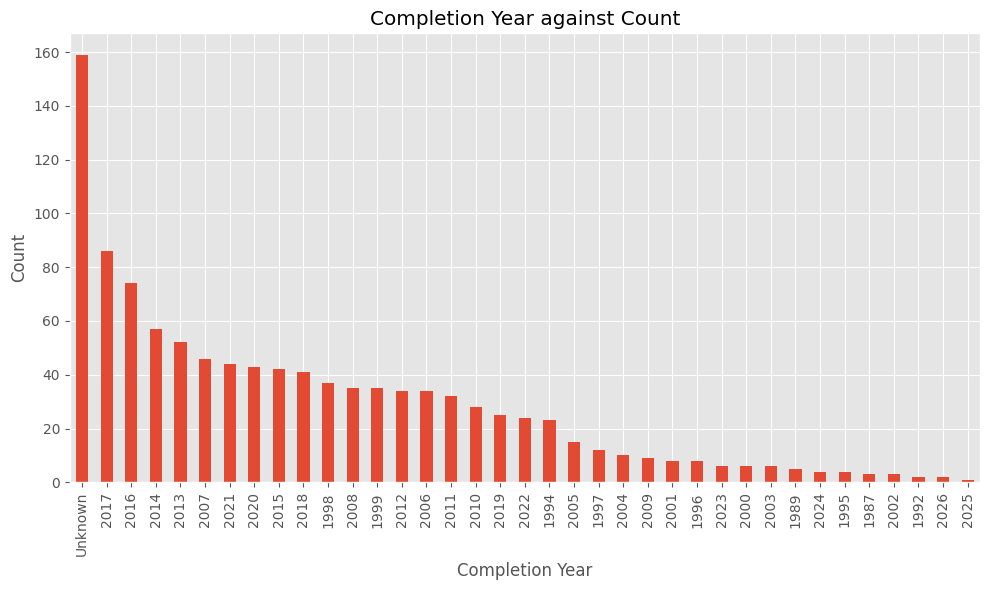

In [109]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = df['Completion Year'].value_counts() \
    .plot(kind='bar', title='Completion Year against Count') 
ax.set_xlabel('Completion Year')  
ax.set_ylabel('Count') 


# To ensure no overlapping between bars 
fig.tight_layout()
fig.show()  

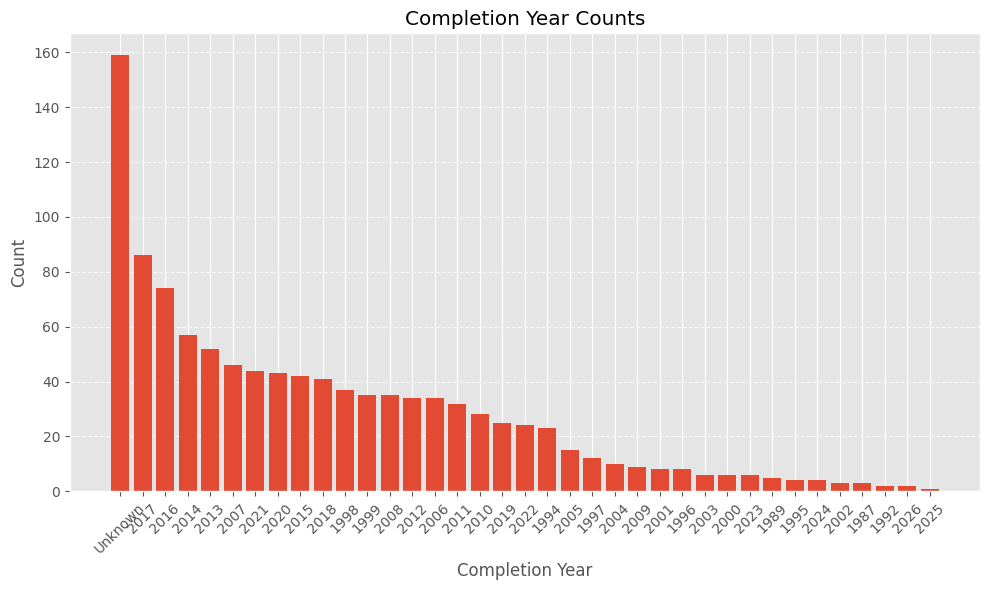

In [110]:
#Same version as above 
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar chart
plt.bar(completion_year_count['Completion Year'], completion_year_count['Count'])

# Set the x-axis, y-axis label
plt.xlabel('Completion Year')
plt.ylabel('Count')

# Set the title of the plot
plt.title('Completion Year Counts')

# Add gridlines to the y-axis for reference
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)  

# Ensure that plot elements do not overlap
plt.tight_layout()
plt.show() 

In [111]:
#Using plotly
fig = px.bar(completion_year_count, x='Completion Year', y='Count', title='Completion Year over Units') 
fig.show()  

In [112]:
# Checking the number of apartments or condo in each states or federals
state_units = df.groupby("State")\
            .size() \
            .reset_index(name="Units") \
            .sort_values(by="Units",ascending=False)

state_units


,State,Units
6,penang,488
11,selangor,275
2,kuala lumpur,181
0,johor,52
9,sabah,22
8,putrajaya,19
10,sarawak,6
3,melaka,5
5,pahang,3
7,perak,2


C:\Users\User\AppData\Local\Temp\ipykernel_16216\3304588595.py:12: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



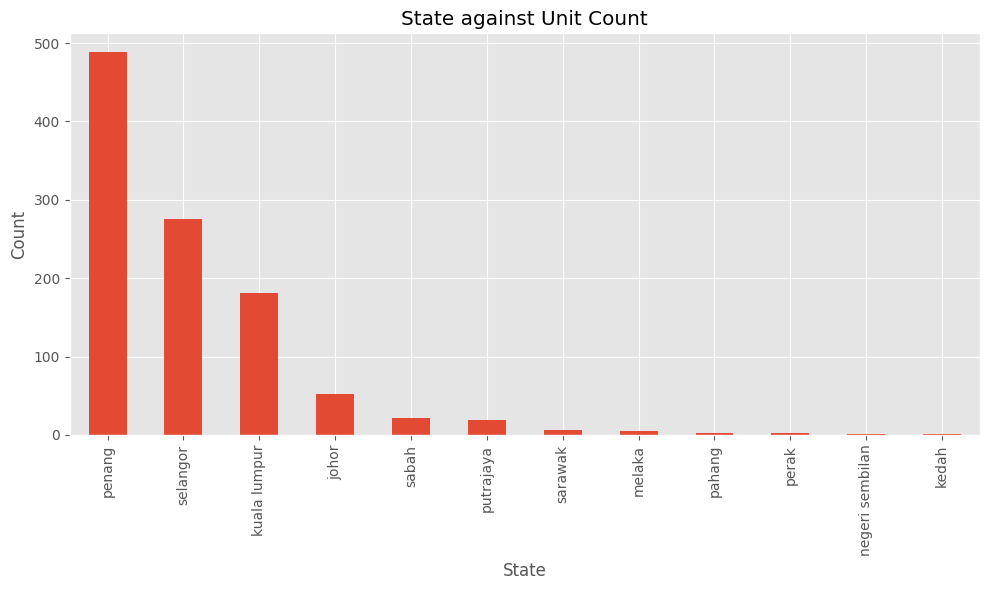

In [113]:
#Using pyplot
# From here, we can say that we have imbalance dataset 
fig, ax = plt.subplots(figsize=(10, 6))
ax = df['State'].value_counts() \
    .plot(kind='bar', title='State against Unit Count') 
ax.set_xlabel('State')  
ax.set_ylabel('Count') 


# To ensure no overlapping between bars 
fig.tight_layout()
fig.show()  

In [114]:
fig = px.bar(state_units, x='State', y='Units', title='States against Unit')
fig.show() 

In [115]:
df.head()

,Bedroom,Bathroom,Property Size,Category,Facilities,Building Name,Developer,Tenure Type,Address,Completion Year,# of Floors,Total Units,Property Type,Parking Lot,Floor Range,Land Title,Firm Type,Firm Number,REN Number,Bus Stop,Mall,Park,School,Hospital,price,Highway,Railway Station,State
0,3,2,1000.0,"Apartment / Condominium, For sale",3,Sri Lavender Apartment,TLS Group,Freehold,"Jalan Sepakat Indah 2/1, Taman Sepakat Indah 2...",2007,13,445,Apartment,1,Medium,Non Bumi Lot,Unknown,Unknown,Unknown,0,0,0,0,0,230000.0,1,0,selangor
1,3,2,1100.0,"Apartment / Condominium, For sale",3,D'Piazza Condominium,X-Scan Penang Sdn Bhd,Freehold,"Jalan Mayang Pasir 2, Bayan Baru, Penang",2010,19,706,Condominium,1,Low,Non Bumi Lot,E,11307,REN 61472,0,0,0,0,0,425000.0,0,0,penang
2,3,2,780.0,"Apartment / Condominium, For sale",3,Pangsapuri Sri Alpinia,IOI Properties Group Berhad,Freehold,"Persiaran Indera, Pusat Bandar Puchong, Puchon...",Unknown,5,281,Condominium,1,Unknown,Non Bumi Lot,E,31484,Unknown,0,0,0,0,0,230000.0,0,0,selangor
3,3,2,660.0,"Apartment / Condominium, For sale",3,Sri Aman Block C (Sri Aman Block 1 & 3),Unknown,Freehold,"Persiaran Paya Terubong 3, Bukit Jambul, Penang",2008,18,701,Apartment,1,Medium,Non Bumi Lot,E,31970,REN 03281,0,0,0,0,0,265000.0,0,0,penang
4,3,2,1250.0,"Apartment / Condominium, For sale",3,Ameera Residence,TLS Group,Freehold,"Jalan Mutiara 3, Mutiara Heights,, Kajang, Sel...",2016,0,428,Condominium,2,Unknown,Non Bumi Lot,E,31484,Unknown,0,0,0,0,0,340000.0,0,0,selangor


In [116]:
property_type_count = df.groupby('Property Type') \
    .size() \
    .reset_index(name='Count') \
    .sort_values(by='Count', ascending=False)   
property_type_count

,Property Type,Count
1,Condominium,686
0,Apartment,244
5,Service Residence,117
3,Flat,5
4,Others,2
2,Duplex,1


In [117]:
fig = px.bar(property_type_count, x='Property Type', y='Count', title='States against Unit') 
fig.show() 

In [118]:
df.shape 

(1055, 28)

In [119]:
df = df[(df['Property Type'] != 'Flat') & (df['Property Type'] != 'Others') & (df['State'] != 'Sabah') & (df['State'] != 'sabah') & (df['State'] != 'putrajaya') & (df['State'] != 'perak') & (df['State'] != 'melaka')]
df.shape 

(1000, 28)

In [120]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your original DataFrame
df2 = df.copy()

columns_to_transform = ['Tenure Type', 'Completion Year', 'Property Type', 'Floor Range', 'Land Title', 'Firm Type', 'State']

#stores all the mappings
all_mappings = {}

for col in columns_to_transform:
    new_column_name = col + "_encoded"
    label_encoder = LabelEncoder()
    df2[new_column_name] = label_encoder.fit_transform(df2[col])  # Use fit_transform to fit and transform
    df2.drop(col, axis=1, inplace=True)  # Drop the original column

    # Create a mapping dictionary
    category_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

    # Store the mapping in the dictionary
    all_mappings[col] = category_mapping 

# Now df2 contains the encoded columns, and the original columns are dropped 
df2.head()


,Bedroom,Bathroom,Property Size,Category,Facilities,Building Name,Developer,Address,# of Floors,Total Units,Parking Lot,Firm Number,REN Number,Bus Stop,Mall,Park,School,Hospital,price,Highway,Railway Station,Tenure Type_encoded,Completion Year_encoded,Property Type_encoded,Floor Range_encoded,Land Title_encoded,Firm Type_encoded,State_encoded
0,3,2,1000.0,"Apartment / Condominium, For sale",3,Sri Lavender Apartment,TLS Group,"Jalan Sepakat Indah 2/1, Taman Sepakat Indah 2...",13,445,1,Unknown,Unknown,0,0,0,0,0,230000.0,1,0,0,16,0,2,2,2,7
1,3,2,1100.0,"Apartment / Condominium, For sale",3,D'Piazza Condominium,X-Scan Penang Sdn Bhd,"Jalan Mayang Pasir 2, Bayan Baru, Penang",19,706,1,11307,REN 61472,0,0,0,0,0,425000.0,0,0,0,19,1,1,2,1,5
2,3,2,780.0,"Apartment / Condominium, For sale",3,Pangsapuri Sri Alpinia,IOI Properties Group Berhad,"Persiaran Indera, Pusat Bandar Puchong, Puchon...",5,281,1,31484,Unknown,0,0,0,0,0,230000.0,0,0,0,36,1,3,2,1,7
3,3,2,660.0,"Apartment / Condominium, For sale",3,Sri Aman Block C (Sri Aman Block 1 & 3),Unknown,"Persiaran Paya Terubong 3, Bukit Jambul, Penang",18,701,1,31970,REN 03281,0,0,0,0,0,265000.0,0,0,0,17,0,2,2,1,5
4,3,2,1250.0,"Apartment / Condominium, For sale",3,Ameera Residence,TLS Group,"Jalan Mutiara 3, Mutiara Heights,, Kajang, Sel...",0,428,2,31484,Unknown,0,0,0,0,0,340000.0,0,0,0,25,1,3,2,1,7


In [121]:
all_mappings

{'Tenure Type': {'Freehold': 0, 'Leasehold': 1},
 'Completion Year': {'1987': 0,
  '1989': 1,
  '1992': 2,
  '1994': 3,
  '1995': 4,
  '1996': 5,
  '1997': 6,
  '1998': 7,
  '1999': 8,
  '2000': 9,
  '2001': 10,
  '2002': 11,
  '2003': 12,
  '2004': 13,
  '2005': 14,
  '2006': 15,
  '2007': 16,
  '2008': 17,
  '2009': 18,
  '2010': 19,
  '2011': 20,
  '2012': 21,
  '2013': 22,
  '2014': 23,
  '2015': 24,
  '2016': 25,
  '2017': 26,
  '2018': 27,
  '2019': 28,
  '2020': 29,
  '2021': 30,
  '2022': 31,
  '2023': 32,
  '2024': 33,
  '2025': 34,
  '2026': 35,
  'Unknown': 36},
 'Property Type': {'Apartment': 0,
  'Condominium': 1,
  'Duplex': 2,
  'Service Residence': 3},
 'Floor Range': {'High': 0, 'Low': 1, 'Medium': 2, 'Unknown': 3},
 'Land Title': {'Bumi Lot': 0, 'Malay Reserved': 1, 'Non Bumi Lot': 2},
 'Firm Type': {'AE': 0, 'E': 1, 'Unknown': 2, 'VE': 3, 'VEPM': 4},
 'State': {'johor': 0,
  'kedah': 1,
  'kuala lumpur': 2,
  'negeri sembilan': 3,
  'pahang': 4,
  'penang': 5,
  'sar

In [122]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1054
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Bedroom                  1000 non-null   int32  
 1   Bathroom                 1000 non-null   int32  
 2   Property Size            1000 non-null   float64
 3   Category                 1000 non-null   object 
 4   Facilities               1000 non-null   object 
 5   Building Name            1000 non-null   object 
 6   Developer                1000 non-null   object 
 7   Address                  1000 non-null   object 
 8   # of Floors              1000 non-null   int32  
 9   Total Units              1000 non-null   int32  
 10  Parking Lot              1000 non-null   int32  
 11  Firm Number              1000 non-null   object 
 12  REN Number               1000 non-null   object 
 13  Bus Stop                 1000 non-null   int32  
 14  Mall                     1000

price
Skewness: 2.6104991376560327


<Figure size 640x480 with 0 Axes>

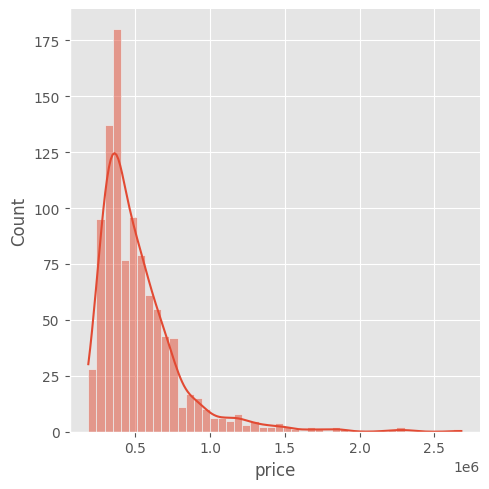

In [123]:
#Checking the skewness
from scipy.stats import skew 

# Check if 'price' is in the columns
if 'price' in df2.columns:
    col = 'price'

    print(col)
    print("Skewness:", skew(df2[col]))

    plt.figure()
    sns.displot(df2[col], kde=True)
    plt.show()
else:
    print("'price' column not found in the DataFrame.")


Original Skewness: 2.6104991376560327
Transformed Skewness: 0.7118815018684936


<Figure size 1000x600 with 0 Axes>

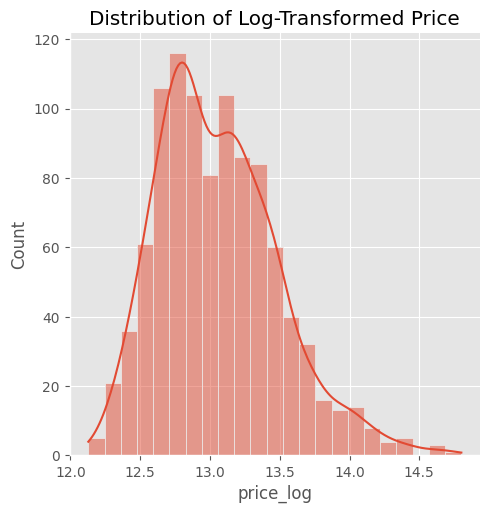

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
import numpy as np

# Check if 'price' is in the columns
if 'price' in df2.columns:
    col = 'price'

    # Display original skewness
    original_skewness = skew(df2[col])
    print(f"Original Skewness: {original_skewness}")

    # Apply log transformation
    df2['price_log'] = np.log1p(df2[col])

    # Display skewness after log transformation
    transformed_skewness = skew(df2['price_log'])
    print(f"Transformed Skewness: {transformed_skewness}")

    # Create a distribution plot for the log-transformed 'price' column
    plt.figure(figsize=(10, 6))
    sns.displot(df2['price_log'], kde=True)
    plt.title('Distribution of Log-Transformed Price')
    plt.show()
else:
    print("'price' column not found in the DataFrame.")


In [125]:
df2.head() 

,Bedroom,Bathroom,Property Size,Category,Facilities,Building Name,Developer,Address,# of Floors,Total Units,Parking Lot,Firm Number,REN Number,Bus Stop,Mall,Park,School,Hospital,price,Highway,Railway Station,Tenure Type_encoded,Completion Year_encoded,Property Type_encoded,Floor Range_encoded,Land Title_encoded,Firm Type_encoded,State_encoded,price_log
0,3,2,1000.0,"Apartment / Condominium, For sale",3,Sri Lavender Apartment,TLS Group,"Jalan Sepakat Indah 2/1, Taman Sepakat Indah 2...",13,445,1,Unknown,Unknown,0,0,0,0,0,230000.0,1,0,0,16,0,2,2,2,7,12.345839
1,3,2,1100.0,"Apartment / Condominium, For sale",3,D'Piazza Condominium,X-Scan Penang Sdn Bhd,"Jalan Mayang Pasir 2, Bayan Baru, Penang",19,706,1,11307,REN 61472,0,0,0,0,0,425000.0,0,0,0,19,1,1,2,1,5,12.959847
2,3,2,780.0,"Apartment / Condominium, For sale",3,Pangsapuri Sri Alpinia,IOI Properties Group Berhad,"Persiaran Indera, Pusat Bandar Puchong, Puchon...",5,281,1,31484,Unknown,0,0,0,0,0,230000.0,0,0,0,36,1,3,2,1,7,12.345839
3,3,2,660.0,"Apartment / Condominium, For sale",3,Sri Aman Block C (Sri Aman Block 1 & 3),Unknown,"Persiaran Paya Terubong 3, Bukit Jambul, Penang",18,701,1,31970,REN 03281,0,0,0,0,0,265000.0,0,0,0,17,0,2,2,1,5,12.487489
4,3,2,1250.0,"Apartment / Condominium, For sale",3,Ameera Residence,TLS Group,"Jalan Mutiara 3, Mutiara Heights,, Kajang, Sel...",0,428,2,31484,Unknown,0,0,0,0,0,340000.0,0,0,0,25,1,3,2,1,7,12.736704


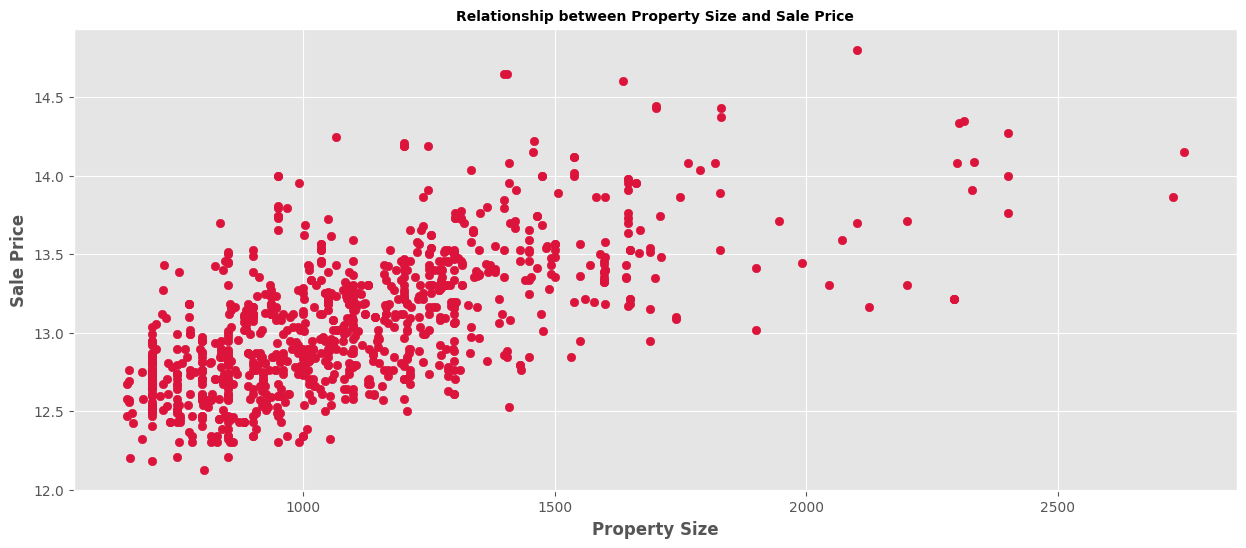

In [126]:
plt.figure(figsize = ((15, 6)))
plt.scatter(x = 'Property Size', y = 'price_log', data = df2, color='crimson')
plt.title('Relationship between Property Size and Sale Price', weight = 'bold', fontsize = 10)
plt.xlabel('Property Size', weight = 'bold')
plt.ylabel('Sale Price', weight = 'bold')  
plt.show() 

In [127]:
#applying correlation matrix on continuous value not encoded values
selected_col_corr = ["Property Size","Bathroom","Bedroom","# of Floors","Parking Lot","price_log"] 
correlation_matrix = df2[selected_col_corr].corr()

correlation_matrix 

,Property Size,Bathroom,Bedroom,# of Floors,Parking Lot,price_log
Property Size,1.000000,0.640284,0.502803,0.102659,0.481234,0.655095
Bathroom,0.640284,1.000000,0.481811,0.104790,0.315305,0.490772
Bedroom,0.502803,0.481811,1.000000,0.027098,0.183100,0.198015
# of Floors,0.102659,0.104790,0.027098,1.000000,0.195176,0.237320
Parking Lot,0.481234,0.315305,0.183100,0.195176,1.000000,0.539487
price_log,0.655095,0.490772,0.198015,0.237320,0.539487,1.000000


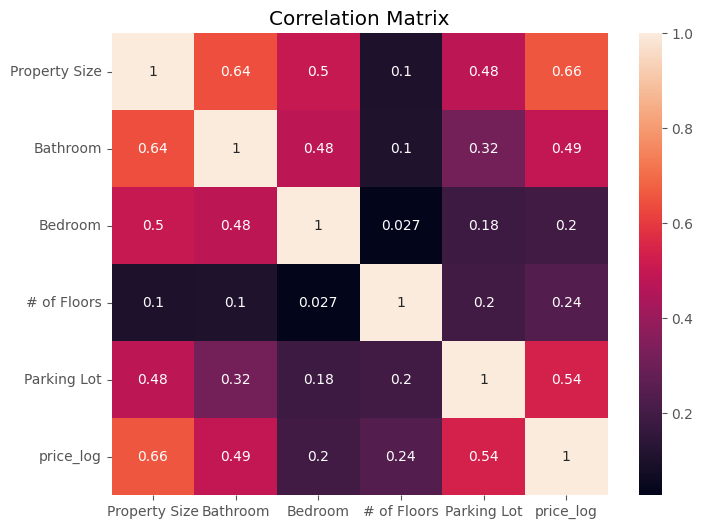

In [128]:
#from the correlation matrix , we can see that most of them  have directly proportional relationship 
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [129]:
df2.columns

Index(['Bedroom', 'Bathroom', 'Property Size', 'Category', 'Facilities',
       'Building Name', 'Developer', 'Address', '# of Floors', 'Total Units',
       'Parking Lot', 'Firm Number', 'REN Number', 'Bus Stop', 'Mall', 'Park',
       'School', 'Hospital', 'price', 'Highway', 'Railway Station',
       'Tenure Type_encoded', 'Completion Year_encoded',
       'Property Type_encoded', 'Floor Range_encoded', 'Land Title_encoded',
       'Firm Type_encoded', 'State_encoded', 'price_log'],
      dtype='object')

In [130]:
from sklearn.model_selection import KFold
features = ['Bedroom','Bathroom','Property Size','Tenure Type_encoded',
            '# of Floors','Property Type_encoded','Parking Lot','Land Title_encoded',
            'Bus Stop','Mall','Park','School','Hospital','State_encoded','Highway','Completion Year_encoded'] 
X = df2[features]  
y = df2['price_log']  
 
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [131]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()

cross_val_scores = cross_val_score(model, X, y, cv=kfold)
print("Cross-Validation Scores:", cross_val_scores)
print("Mean CV Score:", cross_val_scores.mean()) 


Cross-Validation Scores: [0.55932236 0.51079017 0.44002145 0.63065672 0.61197788]
Mean CV Score: 0.550553718996877


In [132]:
#Lasso regression 
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

lasso_model = make_pipeline(Lasso(alpha=0.1))

cross_val_scores = cross_val_score(lasso_model, X, y, cv=5, scoring='r2')
 
print("Cross-Validation Scores:", cross_val_scores)
print("Mean CV Score:", cross_val_scores.mean())


Cross-Validation Scores: [0.43573401 0.50157908 0.35742149 0.53930953 0.41790265]
Mean CV Score: 0.4503893518250363


In [133]:
#Ridge regression 
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


ridge_model = make_pipeline(StandardScaler(), Ridge(alpha=0.1)) 

cross_val_scores = cross_val_score(ridge_model, X, y, cv=5, scoring='r2')

print("Cross-Validation Scores:", cross_val_scores)
print("Mean CV Score:", cross_val_scores.mean()) 


Cross-Validation Scores: [0.51379699 0.55932558 0.49581843 0.60313743 0.53419344]
Mean CV Score: 0.5412543730622369


In [134]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold

model = RandomForestRegressor(random_state=42) 

cross_val_scores = cross_val_score(model, X, y, cv=kfold) 
print("Random Forest Cross-Validation Scores:", cross_val_scores)
print("Mean CV Score:", cross_val_scores.mean())

Random Forest Cross-Validation Scores: [0.79195357 0.74584306 0.74762065 0.73865876 0.74716299]
Mean CV Score: 0.7542478057641329


In [135]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, KFold

model = SVR()

cross_val_scores = cross_val_score(model, X, y, cv=kfold)
print("Support Vector Regression Cross-Validation Scores:", cross_val_scores)
print("Mean CV Score:", cross_val_scores.mean())

Support Vector Regression Cross-Validation Scores: [0.48467635 0.39210738 0.38118367 0.48564542 0.5263803 ]
Mean CV Score: 0.4539986247244247


In [136]:
from xgboost import XGBRegressor 
from sklearn.model_selection import cross_val_score 

model = XGBRegressor(objective='reg:squarederror', random_state=42)

cross_val_scores = cross_val_score(model, X, y, cv=kfold)
print("XGBoost Cross-Validation Scores:", cross_val_scores)  
print("Mean CV Score:", cross_val_scores.mean())    

XGBoost Cross-Validation Scores: [0.79043095 0.7390677  0.72547471 0.71559341 0.73597367]
Mean CV Score: 0.7413080878888325


In [137]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming X, y are your features and target
# Replace these with your actual data

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize KNN Regression model
knn_model = KNeighborsRegressor(n_neighbors=5)

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = cross_val_score(knn_model, X_scaled, y, scoring='neg_mean_squared_error', cv=kf)

# Calculate the mean MSE
mean_mse = np.mean(-mse_scores)
print(f'Mean Squared Error (cross-validated): {mean_mse}') 

Mean Squared Error (cross-validated): 0.07381593380083923


In [138]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
 
# Assuming X, y are your features and target
# Replace these with your actual data

# Initialize Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = cross_val_score(gb_model, X, y, scoring='neg_mean_squared_error', cv=kf)

# Calculate the mean MSE
mean_mse = np.mean(-mse_scores)
print(f'Mean Squared Error (cross-validated): {mean_mse}')

Mean Squared Error (cross-validated): 0.050879544896869744


In [139]:
df2.shape

(1000, 29)

In [140]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold  

model = RandomForestRegressor(random_state=42,n_estimators=100,max_features=4,n_jobs=-1)  
 
cross_val_scores = cross_val_score(model, X, y, cv=kfold)
print("Random Forest Cross-Validation Scores:", cross_val_scores)
print("Mean CV Score:", cross_val_scores.mean())  


Random Forest Cross-Validation Scores: [0.80382178 0.76140013 0.76841246 0.74873057 0.77503597]
Mean CV Score: 0.7714801811589838


In [153]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error 
 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
finalized_model = RandomForestRegressor(random_state=42,n_estimators=100,max_features=4,n_jobs=-1)  
 
finalized_model.fit(X_train,y_train)
prediction = finalized_model.predict(X_test)  

r2 = r2_score(y_test, prediction) 
mse = mean_squared_error(y_test, prediction)
mae = mean_absolute_error(y_test, prediction)

# The R-squared score indicates how well the model's predictions match the actual values. It ranges from 0 to 1, where 1 indicates a perfect fit.
print("R-squared score:", r2)  
print("Mean Squared Error:", mse) 
print("Mean Absolute Error:", mae)  

R-squared score: 0.8419066264154595
Mean Squared Error: 0.03407297559741093
Mean Absolute Error: 0.12874116335632713


In [143]:
import pickle
 
with open('model_pickle','wb') as f: 
    pickle.dump(finalized_model,f)    

In [144]:
df2.head(5)

,Bedroom,Bathroom,Property Size,Category,Facilities,Building Name,Developer,Address,# of Floors,Total Units,Parking Lot,Firm Number,REN Number,Bus Stop,Mall,Park,School,Hospital,price,Highway,Railway Station,Tenure Type_encoded,Completion Year_encoded,Property Type_encoded,Floor Range_encoded,Land Title_encoded,Firm Type_encoded,State_encoded,price_log
0,3,2,1000.0,"Apartment / Condominium, For sale",3,Sri Lavender Apartment,TLS Group,"Jalan Sepakat Indah 2/1, Taman Sepakat Indah 2...",13,445,1,Unknown,Unknown,0,0,0,0,0,230000.0,1,0,0,16,0,2,2,2,7,12.345839
1,3,2,1100.0,"Apartment / Condominium, For sale",3,D'Piazza Condominium,X-Scan Penang Sdn Bhd,"Jalan Mayang Pasir 2, Bayan Baru, Penang",19,706,1,11307,REN 61472,0,0,0,0,0,425000.0,0,0,0,19,1,1,2,1,5,12.959847
2,3,2,780.0,"Apartment / Condominium, For sale",3,Pangsapuri Sri Alpinia,IOI Properties Group Berhad,"Persiaran Indera, Pusat Bandar Puchong, Puchon...",5,281,1,31484,Unknown,0,0,0,0,0,230000.0,0,0,0,36,1,3,2,1,7,12.345839
3,3,2,660.0,"Apartment / Condominium, For sale",3,Sri Aman Block C (Sri Aman Block 1 & 3),Unknown,"Persiaran Paya Terubong 3, Bukit Jambul, Penang",18,701,1,31970,REN 03281,0,0,0,0,0,265000.0,0,0,0,17,0,2,2,1,5,12.487489
4,3,2,1250.0,"Apartment / Condominium, For sale",3,Ameera Residence,TLS Group,"Jalan Mutiara 3, Mutiara Heights,, Kajang, Sel...",0,428,2,31484,Unknown,0,0,0,0,0,340000.0,0,0,0,25,1,3,2,1,7,12.736704


In [145]:
#Fair View is not in here (which is used in Demo)
filtered_df = df[df['Building Name'].str.lower().str.startswith('f')]

# Displaying the result
print(filtered_df['Building Name']) 

364                   Fortune Avenue
450         Fortune Perdana Lakeside
480                     Forest Green
502              Ferringhi Residence
622            Ferringhi Residence 2
646                      Fiera Vista
647                    Fortuna Court
789                Fettes Residences
790                Fettes Residences
791                Fettes Residences
801                      Fiera Vista
802                      Fiera Vista
803                      Fiera Vista
804                      Fiera Vista
805                      Fiera Vista
855     Ferringhi Delima Condominium
1001        Fortune Perdana Lakeside
1015        Fortune Perdana Lakeside
1024       Fortune Court (Ayer Itam)
Name: Building Name, dtype: object


In [146]:
#Fair View is not in here (which is used in Demo) 
filtered_df = df[df['Developer'].str.lower().str.startswith('f')]

# Displaying the result
print(filtered_df['Developer'])

102                   Faber Group
175    Faber Development Holdings
203                    F3 Capital
510    Faber Development Holdings
603               Faber Union Bhd
610    Faber Development Holdings
719       Farlim Group (M) Berhad
825       Farlim Group (M) Berhad
Name: Developer, dtype: object
